In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dfnacl1 = pd.read_csv('data-lif.csv',  sep = ",")
dfnacl2 = pd.read_csv('data-lif2.csv',  sep = ",")

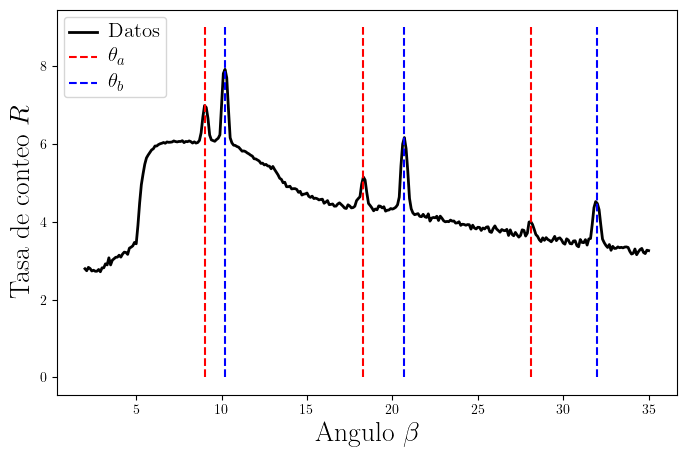

In [86]:
rectaThetaANacl = dfnacl2['thetaa']
rectaThetaBNacl = dfnacl2['thetab']

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

mainLine, = plt.plot(dfnacl1['Theta'], np.log(dfnacl1['R']), '-', color='black', linewidth=2)
lines = [mainLine]  # Lista para almacenar las instancias de las líneas

for i in range(0, len(rectaThetaANacl)):
    xPoint = rectaThetaANacl[i]
    yPoint = np.linspace(0, 9, 10)
    line, = plt.plot([xPoint]*len(yPoint), yPoint, 'r--')
    if i == 0:
        lines.append(line)  # Agregar la instancia a la lista
    

for i in range(0, len(rectaThetaBNacl)):
    xPoint = rectaThetaBNacl[i]
    yPoint = np.linspace(0, 9, 10)
    line, = plt.plot([xPoint]*len(yPoint), yPoint, 'b--')
    if i == 0:
        lines.append(line)  # Agregar la instancia a la lista

legend = plt.legend(lines, ['Datos', '$\\theta_a$', '$\\theta_b$'])
for text in legend.texts:
    text.set_fontsize(15)

plt.xlabel('Angulo $\\beta$', fontdict={'color': 'black', 'size': 20})
plt.ylabel('Tasa de conteo $R$', fontdict={'color': 'black', 'size': 20})
plt.show()


Pendiente para la recta $\lambda_a$:  402.161671280278
Pendiente para la recta $\lambda_b$:  402.4514222098928
Incertidumbre en la pendiente para la recta $\lambda_a$:  0.2898622472364991
Incertidumbre en la pendiente para la recta $\lambda_b$:  0.4280247241211441


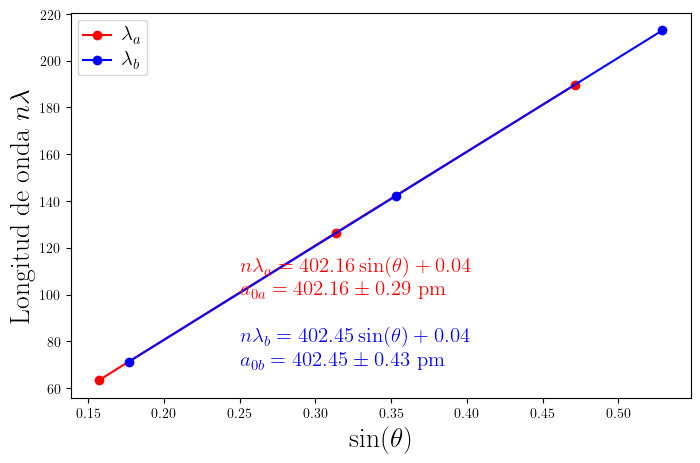

In [87]:
from scipy.stats import linregress

thetaa = dfnacl2['thetaa']
thetaaInce = dfnacl2['thetaad']
thetab = dfnacl2['thetab']
thetabInce = dfnacl2['thetabd']
sinthetaa = np.sin(np.radians(thetaa))
sinthetab = np.sin(np.radians(thetab))
lambdaa = dfnacl2['lambdaa']
lambdaaInce = dfnacl2['lambdaad']
lambdab = dfnacl2['lambdab']
lambdabInce = dfnacl2['lambdabd']

slopeA, intercept, r_value, p_value, std_err = linregress(sinthetaa, lambdaa)
print('Pendiente para la recta $\\lambda_a$: ', slopeA)
slopeB, intercept, r_value, p_value, std_err = linregress(sinthetab, lambdab)
print('Pendiente para la recta $\\lambda_b$: ', slopeB)


# Incertidumbre en la pendiente
def dataWithDesv(x, dx, y, dy):
    nx = x + dx
    ny = y + dy

    slopeA, intercept, r_value, p_value, std_err = linregress(nx, ny)
    return slopeA

slopeAIncePlus = dataWithDesv(sinthetaa, np.sin(np.radians(thetaaInce)), lambdaa, lambdaaInce)
slopeAInceMinus = dataWithDesv(sinthetaa, -np.sin(np.radians(thetaaInce)), lambdaa, -lambdaaInce)

slopeBIncePlus = dataWithDesv(sinthetab, np.sin(np.radians(thetabInce)), lambdab, lambdabInce)
slopeBInceMinus = dataWithDesv(sinthetab, -np.sin(np.radians(thetabInce)), lambdab, -lambdabInce)

inceA = abs((slopeAIncePlus - slopeAInceMinus)/2)
inceB = abs((slopeBIncePlus - slopeBInceMinus)/2)

print('Incertidumbre en la pendiente para la recta $\\lambda_a$: ', inceA)
print('Incertidumbre en la pendiente para la recta $\\lambda_b$: ', inceB)







fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(sinthetaa, lambdaa, 'ro-', label='$\\lambda_a$')
plt.plot(sinthetab, lambdab, 'bo-', label='$\\lambda_b$')
plt.xlabel('$\\sin(\\theta)$', fontdict={'color': 'black', 'size': 20})
plt.ylabel('Longitud de onda $n\\lambda$', fontdict={'color': 'black', 'size': 20})

plt.text(0.35, 110, '$n\\lambda_a = %.2f \\sin(\\theta) + %.2f$' % (slopeA, intercept), fontsize=15, color='red')
plt.text(0.35, 100, '$a_{0a} = %.2f \\pm %.2f$ pm' % (slopeA, inceA), fontsize=15, color='red')

plt.text(0.35, 80, '$n\\lambda_b = %.2f \\sin(\\theta) + %.2f$' % (slopeB, intercept), fontsize=15, color='blue')
plt.text(0.35, 70, '$a_{0b} = %.2f \\pm %.2f$ pm' % (slopeB, inceB), fontsize=15, color='blue')



legend = plt.legend()
for text in legend.texts:
    text.set_fontsize(15)
plt.show()





<>:15: SyntaxWarning: invalid escape sequence '\#'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\#'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\c'
<>:26: SyntaxWarning: invalid escape sequence '\s'
C:\Users\nicho\AppData\Local\Temp\ipykernel_36752\1692272484.py:15: SyntaxWarning: invalid escape sequence '\#'
  plt.xlabel('Z [\# atómico]',fontdict={'color': 'black', 'size': 20})
C:\Users\nicho\AppData\Local\Temp\ipykernel_36752\1692272484.py:16: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sqrt{\\frac{1}{\lambda_k}}\,$ [pm$^{-1/2}$]',fontdict={'color': 'black', 'size': 20})
C:\Users\nicho\AppData\Local\Temp\ipykernel_36752\1692272484.py:25: SyntaxWarning: invalid escape sequence '\c'
  plt.text(40, 0.144, 'Constante de Rydberg $R = 0.827 \cdot 10^7 \, m^{-1}$', font

Constante de Rydberg = 8.82706634299027e-06 sigma_k =  0.0004517405067452477


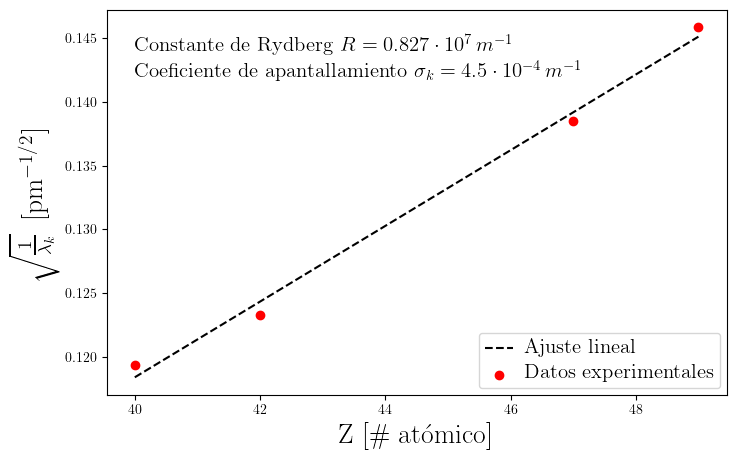

In [81]:
## Crear una grafica de puntos 
x = [40, 42, 47, 49]
y = [(1/70.2)**(0.5),  (1/65.8)**(0.5), (1/52.1)**(0.5), (1/47.0)**(0.5)]
#hacer una regresion de estos datos
m, b = np.polyfit(x, y, 1)
R = m**2
sigma_k = -b

print('Constante de Rydberg =', R, 'sigma_k = ', sigma_k)

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(8)

plt.xlabel('Z [\# atómico]',fontdict={'color': 'black', 'size': 20})
plt.ylabel('$\sqrt{\\frac{1}{\lambda_k}}\,$ [pm$^{-1/2}$]',fontdict={'color': 'black', 'size': 20})

plt.plot(x, m*np.array(x) + b,  linestyle='--', color='k')
plt.scatter(x,y, color='red')

legend = plt.legend(['Ajuste lineal', 'Datos experimentales'], loc='lower right')
for text in legend.texts:
    text.set_fontsize(15)

plt.text(40, 0.144, 'Constante de Rydberg $R = 0.827 \cdot 10^7 \, m^{-1}$', fontsize=15, color='k')
plt.text(40, 0.142, 'Coeficiente de apantallamiento $\sigma_k = 4.5 \cdot 10^{-4} \, m^{-1}$', fontsize=15, color='k')

plt.show()